In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version = 1)

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


mnist.head()

In [10]:
mnist.type() # not clear what the mnist dataset type is?
# the data has 70,000 images with 784 features each because each image is 28 x 28 pixel intensities

AttributeError: type

In [11]:
# datasets downloaded by sklearn have a dictionary structure:
# DESCR key describing the dataset
# a data key one row per instance and one column per feature
# a target key is an array with labels

In [14]:
X, y = mnist["data"], mnist["target"]

In [19]:
X.shape # gives the dimensions

(70000, 784)

In [21]:
y.shape # gives the dimensions

(70000,)

In [22]:
import matplotlib as mpl

In [23]:
import matplotlib.pyplot as plt

In [24]:
some_digit = X[0]

In [25]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [26]:
some_digit_image = some_digit.reshape(28,28)

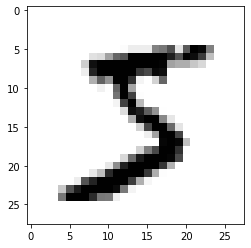

In [27]:
plt.imshow(some_digit_image, cmap="binary")

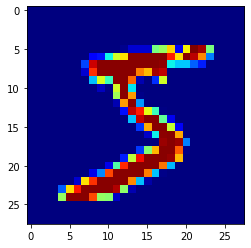

In [28]:
plt.imshow(some_digit_image, cmap="jet")

In [29]:
# now what is the label of this image?
y[0]

'5'

In [30]:
import numpy as np

In [31]:
y = y.astype(np.int8) # convert the type from string to numeric

In [32]:
# the dataset is already split into a training set (the first 60,000 images)
# and a test set (the last 10,000 images)

In [33]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [34]:
# this data is already shuffled...might not always want to shuffle data if it's a time-series

In [35]:
# Training a Binary Classifier

In [36]:
# Start with detecting 5's
y_train_5 = (y_train == 5) # TRUE for all 5s else FALSE
y_test_5 = (y_test == 5)

In [37]:
# The classifier that will be used is Stochastic Gradient Descent SGD
# it handles large datasets very efficiently
# this makes it suitable for online learning

In [38]:
from sklearn.linear_model import SGDClassifier

In [39]:
sgd_clf = SGDClassifier(random_state = 42) # setting the random state parameter helps to get the same results

In [40]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [41]:
# check it on our single instance
sgd_clf.predict([some_digit])

array([ True])

In [42]:
# Evaluate Model Performance Measures
# use the cross_val_score() function to make it happen
from sklearn.model_selection import cross_val_score

In [43]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring = "accuracy") # the split is 3-folds

array([0.95035, 0.96035, 0.9604 ])

In [44]:
# it does greater than 90% accuracy (ratio of correct to total predictions)
# however, only 1 out of 10 images is a 5 so simply guessing "not five" will be right about 90% of the time
# so we can't use accuracy on highly skewed datasets
# instead look at the confusion matrix

In [45]:
from sklearn.model_selection import cross_val_predict

In [46]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [47]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(y_train_5, y_train_pred) # evaluate the training performance

array([[53892,   687],
       [ 1891,  3530]])

In [50]:
# the first column is actual class and the 2nd is predicted class
# the first row is negative class (not 5) and second is positive class (5)

In [51]:
# precision/accuracy TP / (TP + FP)
# recall/sensitivity TP / (TP + FN) # ratio of positive instances correctly classified

In [52]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [53]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [54]:
# F1 score is the harmonic mean of precision and recall
# it gives more weight to lower scores

In [55]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [ ]:
# in some contexts you care about precision and some recall